## Project Milestone 2

This project is a part of the analysis of the movies data set

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET



KEYWORDS = [ "Terrorism", "Terrorist", "Terrorists", "Jihad", "Extremism", "Extremist", "Attacks", "Attack", "Bombs", "Bombing", "Bombers", "Hijack", "Hijacking", "Kidnap", "Kidnapping", "Counterterrorism", "Counterterrorist", "Radicalization", "Radicalized", "Security Threat", "Political Violence", "Suicide Bomber", "War on Terror", "Homeland Security", "National Security", "Intelligence Agencies", "Counterinsurgency", "Terrorist Cells", "Radical Ideology", "Terrorist Plot", "Terrorist Organization", "Hostage Crisis", "Terrorism Investigation", "Counterterrorist Operation", "Radical", "Guerrilla Warfare", "Insurgency", "Terror Threat", "Covert Operations", "Political Unrest", "Martyrdom", "Cyberterrorism", "Terrorism Financing", "Violent Extremism", "Terrorist Recruitment", "Suicide Attacks", "Terrorist Sleeper Cells", "Counterterror Measures", "Clandestine Activities", "Security Intelligence" ]

In [4]:

# Define the path to your text file containing movie plots
file_path = 'data/plot_summaries.txt'

# Read the text file into a DataFrame
df = pd.read_csv(file_path, delimiter='\t', header= None)

# Define list of keywords
movie_ids=[]
# Create a new column in the DataFrame to store the count of keywords in each movie plot
for index, row in df.iterrows():
    movie_id = row[0]
    plot = row[1]
    # Check if the plot contains any of the keywords
    for keyword in KEYWORDS:
        if keyword.lower() in plot:
            movie_ids.append(movie_id)

# Display the list of movie IDs that match the keywords
movie_ids= set(movie_ids)

**2 Basic Data Processing**

In [6]:
#import the data from movie.metadata and rename its columns
m_column_names = ['W_movie ID', 'F_movie ID', 'Movie name', 'Release date', 'Box office revenue', 'Runtime', 'Languages', 'Countries', 'Genres']
m_data = pd.read_csv('data/movie.metadata.tsv', delimiter= '\t',on_bad_lines='skip', names=m_column_names, header=0)

In [7]:
filtered_data = m_data[m_data['W_movie ID'].isin(movie_ids)][['W_movie ID','Movie name', 'Release date','Countries', 'Languages', 'Genres','Box office revenue']]
filtered_data = filtered_data.sort_values(by=['Release date'])
display(filtered_data)

,W_movie ID,Movie name,Release date,Countries,Languages,Genres,Box office revenue
42214,32986669,Robbery Under Arms,1907-11-02,"{""/m/0chghy"": ""Australia""}","{""/m/06ppq"": ""Silent film""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra...",NaN
64189,7870349,Dr. Jekyll and Mr. Hyde,1908-03-07,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",NaN
70994,29391146,The Black Viper,1908-07-25,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/06ppq"": ""Silent film""}",NaN
18652,28777800,The Englishman and the Girl,1910-02-17,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",NaN
45311,13254122,What the Daisy Said,1910-07-11,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",NaN
...,...,...,...,...,...,...,...
81156,11971266,La Guerre des tuques,NaN,"{""/m/0d060g"": ""Canada""}","{""/m/064_8sq"": ""French Language""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/0hj3mt...",NaN
81303,11515305,Buio Omega,NaN,"{""/m/03rjj"": ""Italy""}","{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/03npn"": ""Horror""}",NaN
81312,27613497,Emperor: Young Caesar,NaN,{},{},"{""/m/06l3bl"": ""Epic""}",NaN
81340,27646962,Raging Sharks,NaN,"{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/02h40lc"": ""English Language""}","{""/m/03npn"": ""Horror""}",NaN


In [93]:
filtered_data['Release year'] = filtered_data['Release date'].str[:4]
display(filtered_data)
print(filtered_data['Release year'].isna().sum())

,W_movie ID,Movie name,Release date,Countries,Languages,Genres,Box office revenue,Release year
42214,32986669,robbery under arms,1907-11-02,"{""/m/0chghy"": ""Australia""}","{""/m/06ppq"": ""Silent film""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra...",NaN,1907
64189,7870349,dr. jekyll and mr. hyde,1908-03-07,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",NaN,1908
70994,29391146,the black viper,1908-07-25,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/06ppq"": ""Silent film""}",NaN,1908
18652,28777800,the englishman and the girl,1910-02-17,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",NaN,1910
45311,13254122,what the daisy said,1910-07-11,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",NaN,1910
...,...,...,...,...,...,...,...,...
62760,36018402,simanaheen,2012-12-12,"{""/m/0162b"": ""Bangladesh"", ""/m/09c7w0"": ""Unite...","{""/m/01c7y"": ""Bengali Language""}","{""/m/02l7c8"": ""Romance Film""}",NaN,2012
40367,34953010,zero dark thirty,2012-12-19,"{""/m/09c7w0"": ""United States of America""}","{""/m/02h40lc"": ""English Language""}","{""/m/01jfsb"": ""Thriller"", ""/m/02kdv5l"": ""Actio...",NaN,2012
3303,32258845,pain & gain,2013-04-26,"{""/m/09c7w0"": ""United States of America""}",{},"{""/m/05p553"": ""Comedy film"", ""/m/02kdv5l"": ""Ac...",NaN,2013
32374,35627063,the smurfs 2,2013-07-31,"{""/m/09c7w0"": ""United States of America""}",{},"{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...",NaN,2013


0


1907
2013


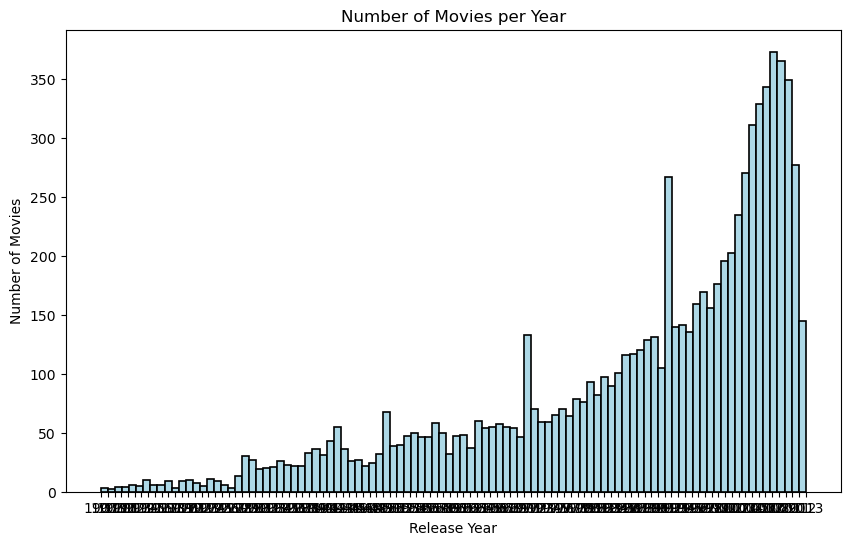

In [86]:
filtered_data.dropna(subset=['Release year'], inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(filtered_data['Release year'],bins= 100, linewidth=1.2, edgecolor='black', color='lightblue')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
min_year = int(filtered_data['Release year'].min())
print(min_year)
max_year = int(filtered_data['Release year'].max())
print(max_year)
plt.title('Number of Movies per Year')
 # rotate the xticks by 90 degrees
plt.show()


In [90]:
filtered_data['Box office revenue'].describe()

count    2.519000e+03
mean     8.276545e+07
std      1.581620e+08
min      1.051400e+04
25%      6.106830e+06
50%      2.618663e+07
75%      8.553192e+07
max      2.782275e+09
Name: Box office revenue, dtype: float64

c:\Users\bilal\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bilal\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Box office revenue', ylabel='Count'>

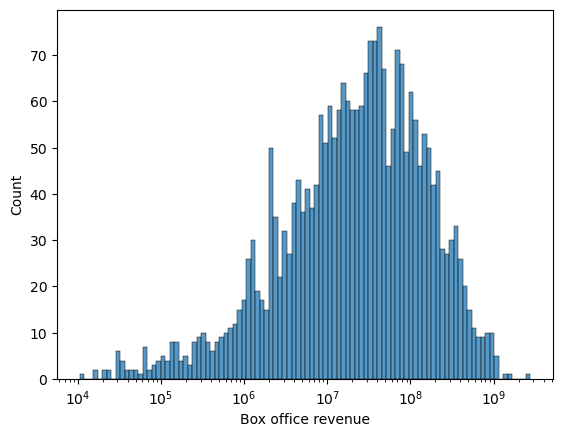

In [71]:
a=filtered_data['Box office revenue'].dropna()
sns.histplot(a, bins=100, log_scale=True)
